# Pluto Plotting

of the Kelvin-Helmholtz instability

To run this notebook, you need to download and run the `PLUTO` code. Instructions can be found in [`Readme.md`](Readme.md).

In [1]:
import matplotlib as mpl
#mpl.use('Qt5Agg')
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import glob
import pyPLUTO as pp

#use e.g. `qt5` instead of `inline` for GUI plots

%matplotlib inline
plt.style.use({'figure.dpi':100})

Read in the data

In [2]:
files = glob.glob('data*.dbl')
D = [pp.pload(i,w_dir='./') for i in range(len(files))]

Reading Data file : ./data.0000.dbl
Reading Data file : ./data.0001.dbl
Reading Data file : ./data.0002.dbl
Reading Data file : ./data.0003.dbl
Reading Data file : ./data.0004.dbl
Reading Data file : ./data.0005.dbl
Reading Data file : ./data.0006.dbl
Reading Data file : ./data.0007.dbl
Reading Data file : ./data.0008.dbl
Reading Data file : ./data.0009.dbl
Reading Data file : ./data.0010.dbl
Reading Data file : ./data.0011.dbl
Reading Data file : ./data.0012.dbl
Reading Data file : ./data.0013.dbl
Reading Data file : ./data.0014.dbl
Reading Data file : ./data.0015.dbl
Reading Data file : ./data.0016.dbl
Reading Data file : ./data.0017.dbl
Reading Data file : ./data.0018.dbl
Reading Data file : ./data.0019.dbl
Reading Data file : ./data.0020.dbl
Reading Data file : ./data.0021.dbl
Reading Data file : ./data.0022.dbl
Reading Data file : ./data.0023.dbl
Reading Data file : ./data.0024.dbl
Reading Data file : ./data.0025.dbl
Reading Data file : ./data.0026.dbl
Reading Data file : ./data.0

Set some plotting parameters

In [3]:
q = len(D[0].x1)//40; # for quiver plots: plot every qth arrow only
quantity = 'tr1' # 'rho', 'tr1'

In [4]:
if quantity is 'rho':
    name = 'Density'
    vmin = [getattr(_D,quantity).min() for _D in D][-1]
    vmax = [getattr(_D,quantity).max() for _D in D][-1]
elif quantity is 'tr1':
    vmin = 0
    vmax = 1
    name = 'Tracer'

## Static plotting

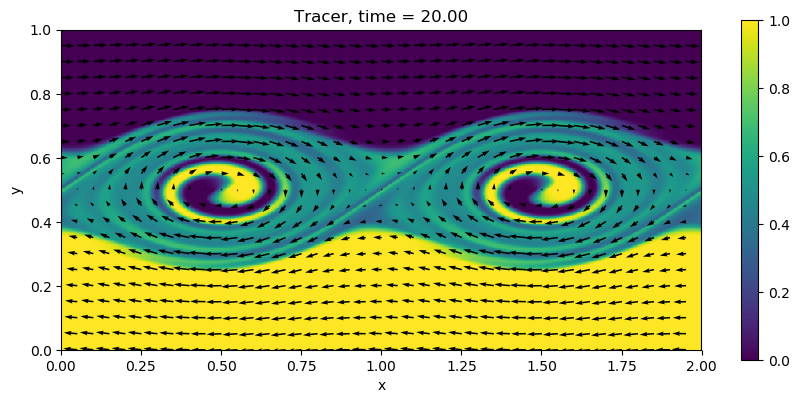

In [5]:
D1 = D[-1]

f,ax = plt.subplots(figsize=(10,4))
cc = ax.pcolormesh(D1.x1,D1.x2,D1.tr1.T,vmin=0,vmax=1)
ax.set_title('{}, time = {:.2f}'.format(name,D1.SimTime))
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
qq=ax.quiver(D1.x1[::q],D1.x2[::q],D1.vx1[::q,::q].T,D1.vx2[::q,::q].T,scale=None)
cc=plt.colorbar(cc,ax=ax)
f.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.95);

## Create an animation

In [6]:
def animate(i,init=False):
    if init:
       
        cc = ax.pcolormesh(D[0].x1,D[0].x2,getattr(D[0],quantity).T,edgecolors='face',lw=0.5,alpha=1.0,vmin=vmin,vmax=vmax)
        qq = ax.quiver(D[0].x1[::q],D[0].x2[::q],D[i].vx1[::q,::q].T,D[i].vx2[::q,::q].T,scale=None)
        ax.set_aspect('equal')
        ax.set_xlabel('$x$ [au]')
        ax.set_ylabel('$y$ [au]')
        cb=plt.colorbar(cc,ax=ax)
        ax.set_title('{}, time = {:.2f}'.format(name,D[i].SimTime))
        #cb.set_label(r'$\rho_\mathrm{d}$ [g cm$^{-3}$]')
        f.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.95);
        
        return cc
    
    else:
        quad1 = ax.findobj(lambda o: type(o)==mpl.collections.QuadMesh)[0]
        quad1.set_array(getattr(D[i],quantity).T.ravel())
        
        quiver1 = ax.findobj(lambda o: type(o)==mpl.quiver.Quiver)[0]
        quiver1.set_UVC(D[i].vx1[::q,::q].T,D[i].vx2[::q,::q].T)
        
        ax.set_title('{}, time = {:.2f}'.format(name,D[i].SimTime))

        return quad1, quiver1
    
mpl.rc('animation', html='html5')
f,ax = plt.subplots(1,1,figsize=(10,4))
anim = animation.FuncAnimation(f,animate,frames=len(files), init_func=lambda :animate(0,init=True), interval=33,blit=False,)
plt.close(f)

In [8]:
display(anim)